In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mtl
import scipy.stats as st
import statsmodels.api as sm
import missingno  as msno
import matplotlib.pyplot as plt

In [5]:
sns.set()
plt.style.use('ggplot')
from IPython.core.pylabtools import figsize
figsize(10, 8)

# Trabalhando com a base de Portogrande

- ### Vamos conhecer um pouco sobre a base de dados

In [6]:
portogrande = pd.read_csv('../data/oiapoque.txt')

In [10]:
# dimensão do dataframe
portogrande.shape

(3144, 20)

In [11]:
# features
portogrande.columns

Index(['codigo_estacao', 'data', 'hora', 'temp_inst', 'temp_max', 'temp_min',
       'umid_inst', 'umid_max', 'umid_min', 'pto_orvalho_inst',
       'pto_orvalho_max', 'pto_orvalho_min', 'pressao', 'pressao_max',
       'pressao_min', 'vento_vel', 'vento_direcao', 'vento_rajada', 'radiacao',
       'precipitacao'],
      dtype='object')

In [12]:
# algumas informações
portogrande.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   codigo_estacao    3144 non-null   object 
 1   data              3144 non-null   object 
 2   hora              3144 non-null   int64  
 3   temp_inst         3144 non-null   float64
 4   temp_max          3144 non-null   float64
 5   temp_min          3144 non-null   float64
 6   umid_inst         3144 non-null   int64  
 7   umid_max          3144 non-null   int64  
 8   umid_min          3144 non-null   int64  
 9   pto_orvalho_inst  3144 non-null   float64
 10  pto_orvalho_max   3144 non-null   float64
 11  pto_orvalho_min   3144 non-null   float64
 12  pressao           3144 non-null   float64
 13  pressao_max       3144 non-null   float64
 14  pressao_min       3144 non-null   float64
 15  vento_vel         3143 non-null   float64
 16  vento_direcao     3142 non-null   float64


In [13]:
# tabela percentual de dados faltantes

features_numericas = ["hora","temp_inst", "temp_max", "temp_min", "umid_inst","umid_max","umid_min",
                      "pto_orvalho_inst", "pto_orvalho_max", "pto_orvalho_min","pressao", "vento_vel", 
                      "vento_direcao", "vento_rajada", "radiacao","precipitacao"]

df = oiapoque[features_numericas]


total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)


missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Dados Ausentes', '% Percentual'])
missing_data.index.name =' Variaveis numericas'
missing_data.head(20)

,Dados Ausentes,% Percentual
Variaveis numericas,,
vento_rajada,2,0.000636
vento_direcao,2,0.000636
vento_vel,1,0.000318
precipitacao,0,0.000000
radiacao,0,0.000000
pressao,0,0.000000
pto_orvalho_min,0,0.000000
pto_orvalho_max,0,0.000000
pto_orvalho_inst,0,0.000000


In [14]:
# 0s 10 valore que mais se repetem na coluna precipitação
portogrande.precipitacao.value_counts().head(10)

0.0    2527
0.2     182
0.4      72
0.6      54
0.8      38
1.0      26
1.2      19
2.4      14
1.4      14
2.2      14
Name: precipitacao, dtype: int64

In [15]:
# algumas caracteristicas estatisticas
portogrande.describe()

,hora,temp_inst,temp_max,temp_min,umid_inst,umid_max,umid_min,pto_orvalho_inst,pto_orvalho_max,pto_orvalho_min,pressao,pressao_max,pressao_min,vento_vel,vento_direcao,vento_rajada,radiacao,precipitacao
count,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3144.000000,3143.000000,3142.000000,3142.000000,3144.000000,3144.000000
mean,11.500000,25.367430,25.821501,24.948823,91.631997,93.704517,89.415394,23.750350,24.175318,23.376940,1011.113709,1011.388772,1010.837913,0.974356,111.135901,3.075589,605.612084,0.415776
std,6.923288,2.327578,2.578945,2.065242,11.071819,9.091337,12.847666,1.011939,1.109483,0.976497,1.535141,1.524238,1.519784,0.775646,80.274725,2.322550,849.589963,1.732541
min,0.000000,20.300000,20.400000,20.300000,55.000000,57.000000,48.000000,19.900000,20.400000,19.300000,1005.800000,1006.000000,1005.700000,0.100000,1.000000,0.500000,-3.540000,0.000000
25%,5.750000,23.700000,23.900000,23.500000,86.000000,91.000000,81.000000,23.100000,23.500000,22.800000,1010.000000,1010.300000,1009.700000,0.400000,49.000000,1.100000,-2.300000,0.000000
50%,11.500000,24.700000,25.000000,24.400000,97.000000,98.000000,96.000000,23.800000,24.200000,23.500000,1011.100000,1011.400000,1010.800000,0.700000,95.500000,2.100000,33.835000,0.000000
75%,17.250000,27.000000,27.800000,26.200000,100.000000,100.000000,100.000000,24.500000,25.000000,24.100000,1012.200000,1012.500000,1011.900000,1.400000,144.000000,4.900000,1197.500000,0.000000
max,23.000000,32.300000,32.700000,31.400000,100.000000,100.000000,100.000000,26.600000,27.400000,26.100000,1016.300000,1016.400000,1015.800000,3.900000,360.000000,19.000000,3638.000000,25.800000


In [16]:
# Variaveis numéricas
varNum = portogrande.select_dtypes(include=[np.number])
varNum.columns

Index(['hora', 'temp_inst', 'temp_max', 'temp_min', 'umid_inst', 'umid_max',
       'umid_min', 'pto_orvalho_inst', 'pto_orvalho_max', 'pto_orvalho_min',
       'pressao', 'pressao_max', 'pressao_min', 'vento_vel', 'vento_direcao',
       'vento_rajada', 'radiacao', 'precipitacao'],
      dtype='object')

In [17]:
# variaveis categoricas
varCat = portogrande.select_dtypes(include=[np.object])
varCat.columns

Index(['codigo_estacao', 'data'], dtype='object')

In [18]:
# resumindo
print(f'Total de Variaveis Numericas: {varNum.columns.value_counts().sum()}')
print(f'Total de Variaveis Categoricas: {varCat.columns.value_counts().sum()}')

Total de Variaveis Numericas: 18
Total de Variaveis Categoricas: 2


# Visualizando Valores Ausentes

- ### Matriz de Nulidade

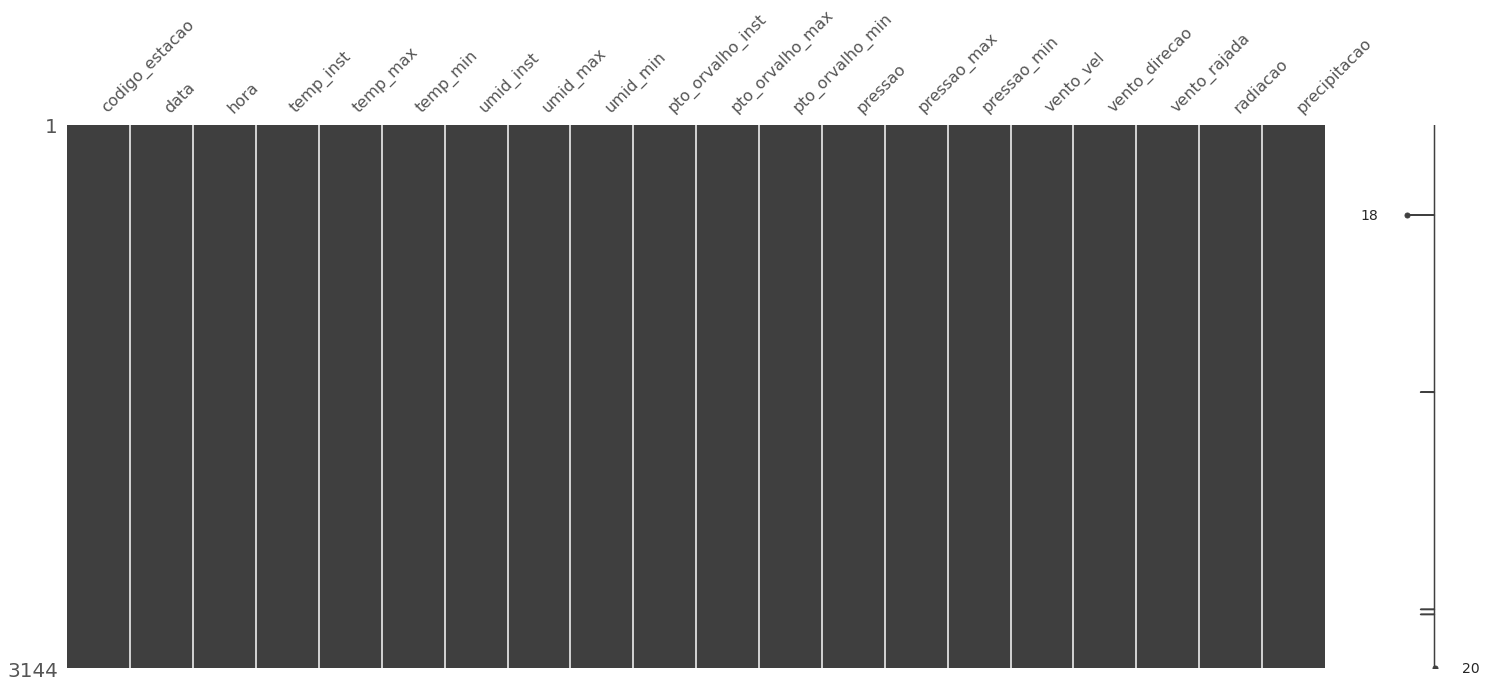

In [19]:
msno.matrix(portogrande)

- ## HeatMap de Nulidade

Mede a correlação de nulidade: Quão fortemente a presença ou ausência de uma variável afeta a presença de outra:

### Legenda:

- A correlação de nulidade varia de -1 a 0
- correlação de nulidade varia de -1 (se uma variável parece a outra definitivamente não aparece) 
- Se for 0 (variáveis que aparecem ou não aparecem não têm efeito uma sobre a outra)
- Se for 1 (se uma variável aparece, a outra definitivamente também tem influencia sobre a outra)
- As entradas marcadas <1ou > -1 estão com uma correlação próxima de ser exatamente negativa ou 
  positiva. 

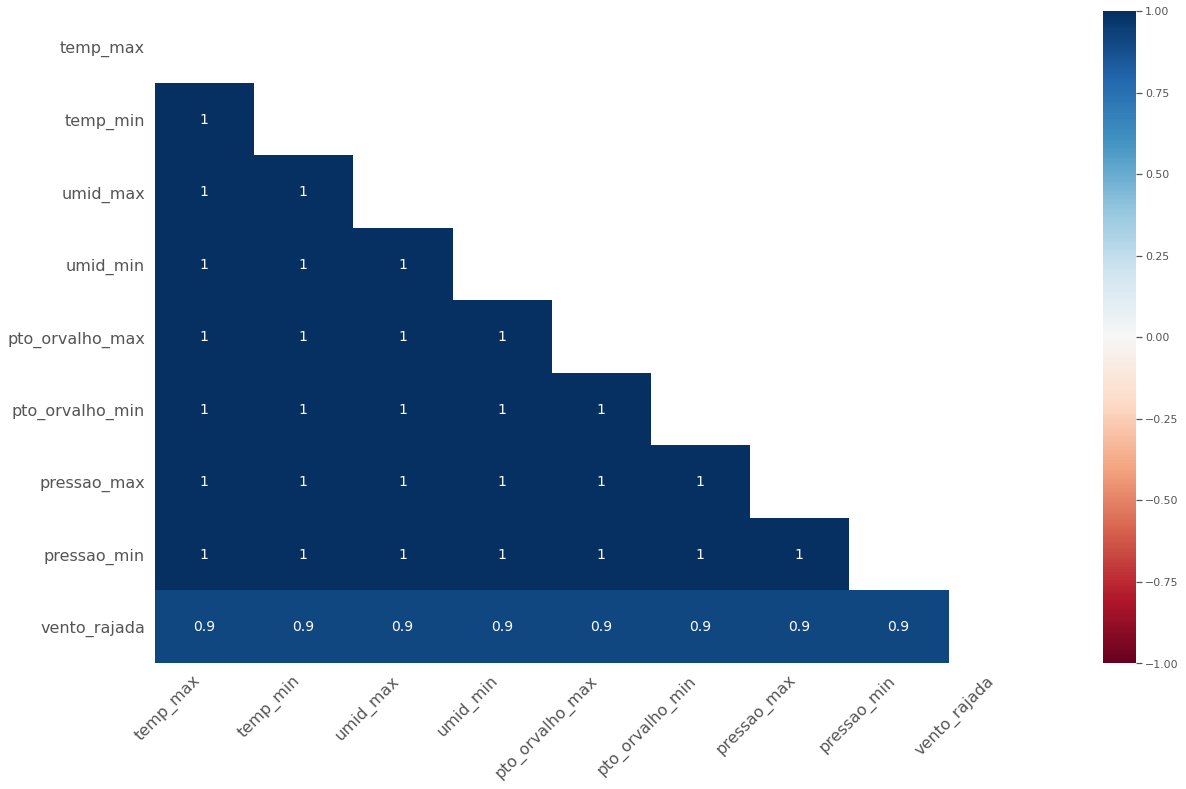

In [14]:
msno.heatmap(portogrande)

- ## Grafíco de Barras de Nulidade

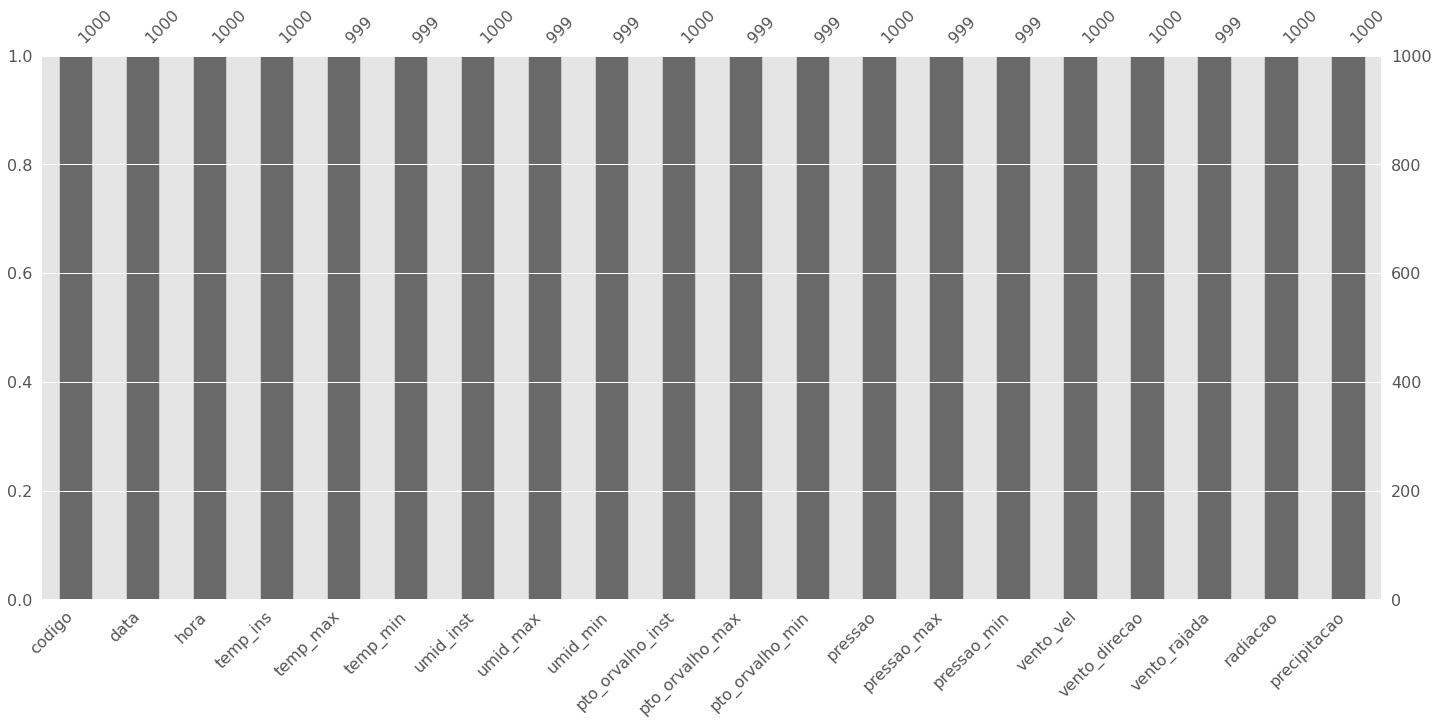

In [15]:
msno.bar(portogrande.sample(1000))

# Estimando os valores de Skewness e Kurtose

In [16]:
# Estimando Skewness 
portogrande.skew()

hora                -0.017017
temp_ins             0.837004
temp_max             0.715845
temp_min             0.952201
umid_inst           -1.033145
umid_max            -1.263100
umid_min            -0.830147
pto_orvalho_inst    -1.297657
pto_orvalho_max     -0.692387
pto_orvalho_min     -1.648043
pressao             -0.036991
pressao_max         -0.064076
pressao_min         -0.007036
vento_vel            0.758926
vento_direcao        0.567858
vento_rajada         0.719513
radiacao             1.093150
precipitacao        11.921399
dtype: float64

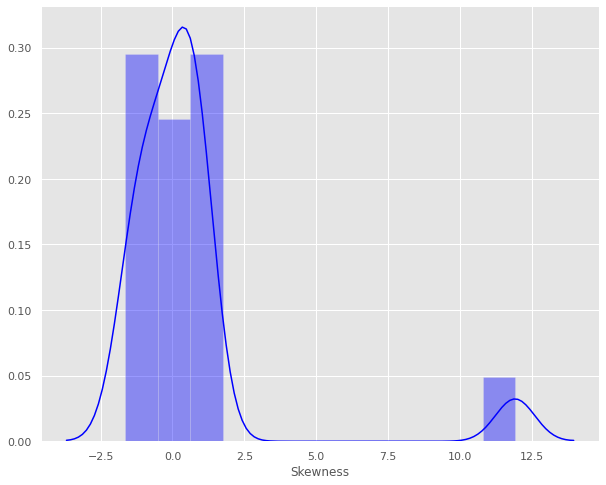

In [17]:
# grafico dos valores de Skewness do dataset
sns.distplot(portogrande.skew(),color='blue',axlabel ='Skewness')

In [18]:
# Estimando Kurtose
portogrande.kurt()

hora                 -1.203864
temp_ins             -0.365711
temp_max             -0.664617
temp_min             -0.034585
umid_inst            -0.018793
umid_max              0.617732
umid_min             -0.487536
pto_orvalho_inst      3.063585
pto_orvalho_max       1.399958
pto_orvalho_min       4.088854
pressao              -0.336953
pressao_max          -0.326096
pressao_min          -0.336401
vento_vel             0.391450
vento_direcao        -1.394431
vento_rajada          0.131017
radiacao             -0.192563
precipitacao        198.911423
dtype: float64

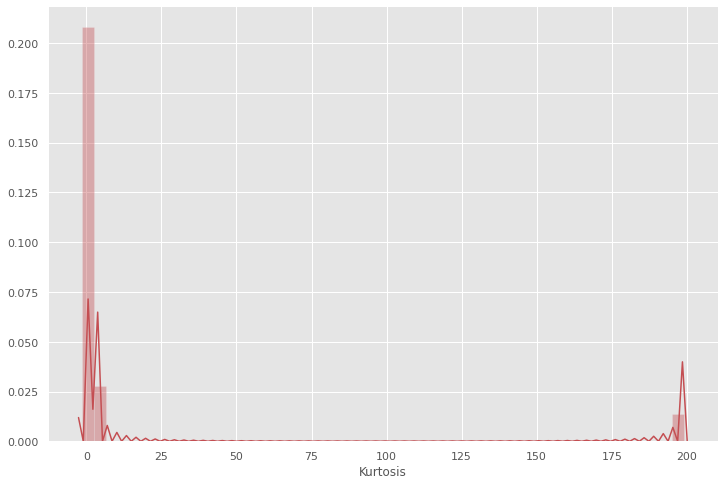

In [19]:
# Comparando a distribuição e verificando sua Kurtose
plt.figure(figsize = (12,8))
sns.distplot(portogrande.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

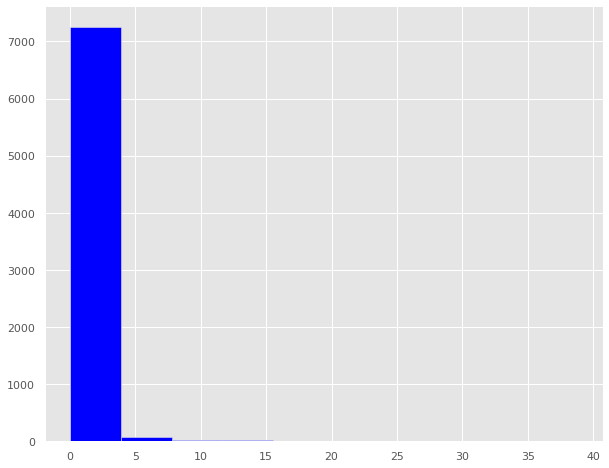

In [20]:
# precipitação
plt.hist(portogrande['precipitacao'],orientation = 'vertical',histtype = 'bar', color ='blue')
plt.show()

(array([3.000e+00, 3.400e+01, 9.100e+01, 1.910e+02, 3.090e+02, 4.400e+02,
        5.260e+02, 8.410e+02, 1.163e+03, 3.781e+03]),
 array([3.4339872 , 3.54805958, 3.66213196, 3.77620434, 3.89027671,
        4.00434909, 4.11842147, 4.23249385, 4.34656622, 4.4606386 ,
        4.57471098]),
 <a list of 10 Patch objects>)

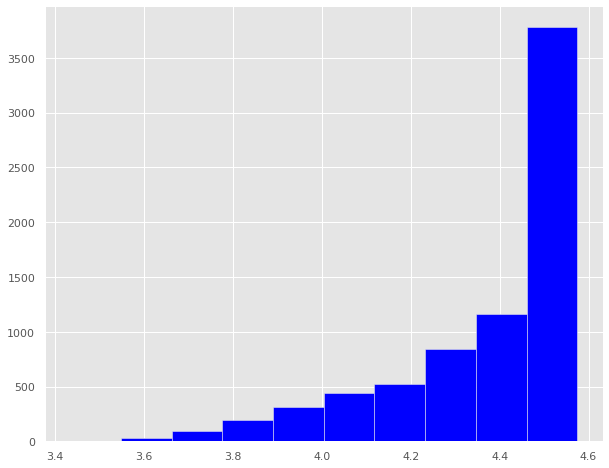

In [21]:
target = np.log(portogrande['umid_inst'])
target.skew()
plt.hist(target,color='blue')

# Correlação 

- ## Dendrograma

Permite correlacionar mais completamente a conclusão das variáveis, revelando tendências mais profundas do que as pares aos pares visíveis no mapa de calor da correlação:

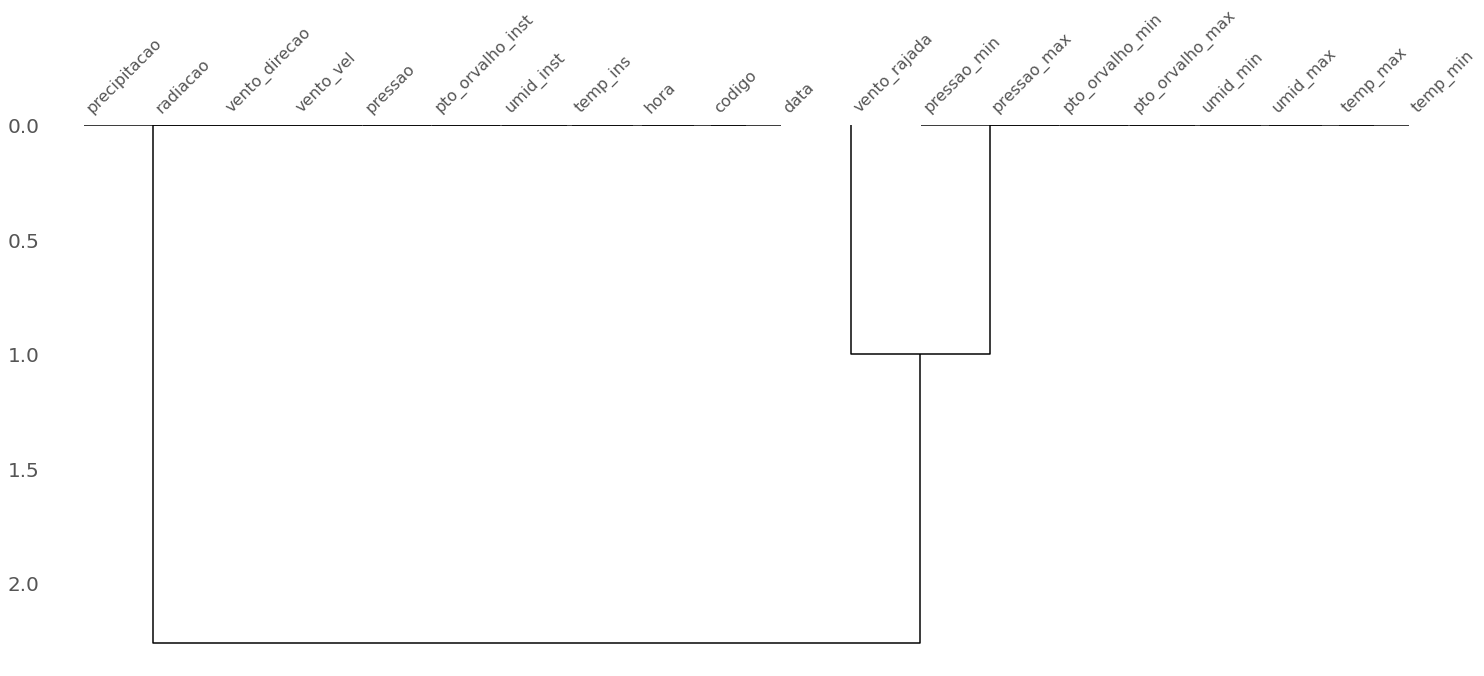

In [22]:
msno.dendrogram(portogrande)

- ### Matrix de Correlação

In [23]:
corr = portogrande.corr(method = 'pearson')
corr

,hora,temp_ins,temp_max,temp_min,umid_inst,umid_max,umid_min,pto_orvalho_inst,pto_orvalho_max,pto_orvalho_min,pressao,pressao_max,pressao_min,vento_vel,vento_direcao,vento_rajada,radiacao,precipitacao
hora,1.000000,0.551656,0.595587,0.539742,-0.520417,-0.495958,-0.572815,-0.105284,0.071007,-0.273694,-0.311580,-0.287317,-0.312801,0.456340,-0.221187,0.526461,0.450957,0.082556
temp_ins,0.551656,1.000000,0.966705,0.969853,-0.968629,-0.921790,-0.938271,-0.365409,-0.091255,-0.519299,-0.223668,-0.147553,-0.183058,0.670781,-0.437506,0.671599,0.839728,-0.099075
temp_max,0.595587,0.966705,1.000000,0.956758,-0.944218,-0.916437,-0.975250,-0.363356,-0.087282,-0.549205,-0.264649,-0.191721,-0.229067,0.704894,-0.444909,0.749281,0.803731,-0.015322
temp_min,0.539742,0.969853,0.956758,1.000000,-0.954258,-0.960083,-0.939288,-0.420357,-0.173407,-0.552214,-0.294407,-0.222724,-0.254314,0.646572,-0.437121,0.647541,0.751546,-0.112222
umid_inst,-0.520417,-0.968629,-0.944218,-0.954258,1.000000,0.970060,0.965717,0.565139,0.294759,0.681856,0.215355,0.144562,0.176050,-0.674345,0.416442,-0.663137,-0.797813,0.113414
umid_max,-0.495958,-0.921790,-0.916437,-0.960083,0.970060,1.000000,0.952839,0.625143,0.413024,0.733351,0.278129,0.213401,0.241042,-0.629351,0.398781,-0.625001,-0.694223,0.115047
umid_min,-0.572815,-0.938271,-0.975250,-0.939288,0.965717,0.952839,1.000000,0.516736,0.260718,0.689529,0.255226,0.187419,0.221492,-0.696915,0.430847,-0.737264,-0.762445,0.027317
pto_orvalho_inst,-0.105284,-0.365409,-0.363356,-0.420357,0.565139,0.625143,0.516736,1.000000,0.886685,0.917284,0.128206,0.099389,0.104044,-0.261872,0.051750,-0.223748,-0.239289,0.071937
pto_orvalho_max,0.071007,-0.091255,-0.087282,-0.173407,0.294759,0.413024,0.260718,0.886685,1.000000,0.800980,0.111198,0.115102,0.104799,-0.017653,-0.068658,0.028167,0.075466,0.106429
pto_orvalho_min,-0.273694,-0.519299,-0.549205,-0.552214,0.681856,0.733351,0.689529,0.917284,0.800980,1.000000,0.174748,0.132466,0.148070,-0.374347,0.121131,-0.398471,-0.389225,0.008133


- ### HeatMap Correlação 

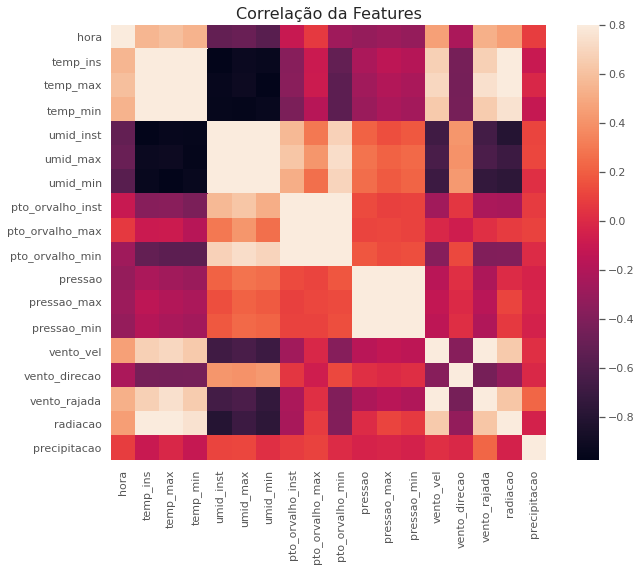

In [24]:
ax = plt.subplots(figsize=(11, 8))

plt.title('Correlação da Features',y=1,size=16)

sns.heatmap(corr,square = True,  vmax=0.8)

- ### Zoomed HeatMap

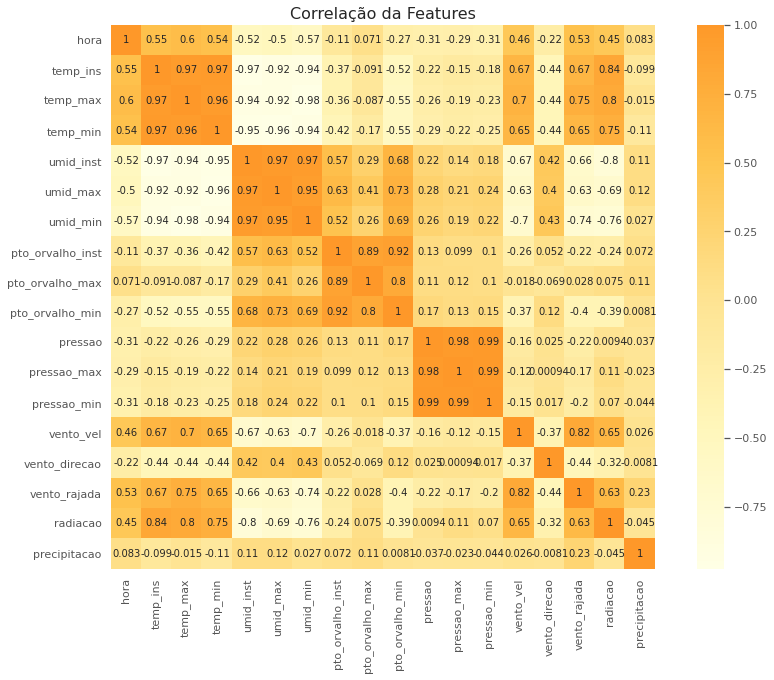

In [25]:
plt.subplots(figsize=(15, 10))

plt.title('Correlação da Features',y=1,size=16)

sns.heatmap(corr, center=True, square=True, annot=True, cmap="YlOrBr");

- ### Grafícos de Dispersão

In [26]:
portogrande.columns

Index(['codigo', 'data', 'hora', 'temp_ins', 'temp_max', 'temp_min',
       'umid_inst', 'umid_max', 'umid_min', 'pto_orvalho_inst',
       'pto_orvalho_max', 'pto_orvalho_min', 'pressao', 'pressao_max',
       'pressao_min', 'vento_vel', 'vento_direcao', 'vento_rajada', 'radiacao',
       'precipitacao'],
      dtype='object')

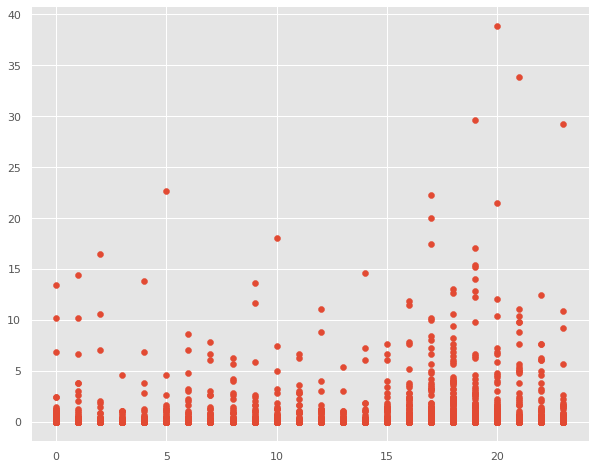

In [27]:
plt.scatter(portogrande.hora, portogrande.precipitacao)

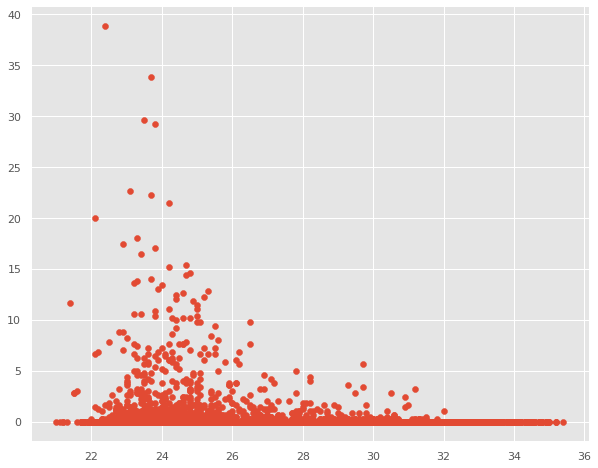

In [28]:
plt.scatter(portogrande.temp_ins, portogrande.precipitacao)

# Verificar Distribuição

- ### Boxplot

/home/douglas/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


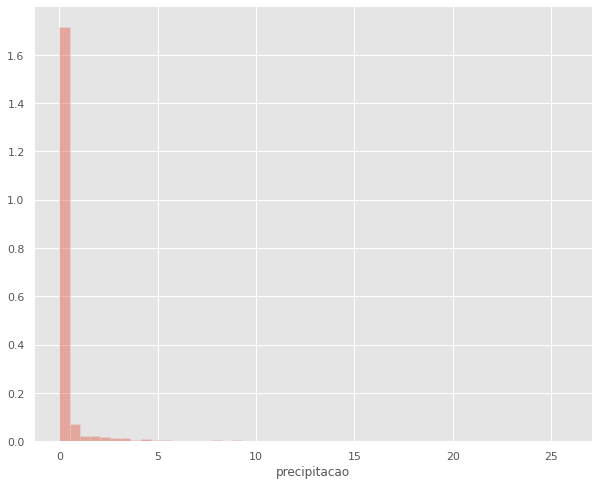

In [7]:
# precipitacao
sns.distplot(portogrande.precipitacao)

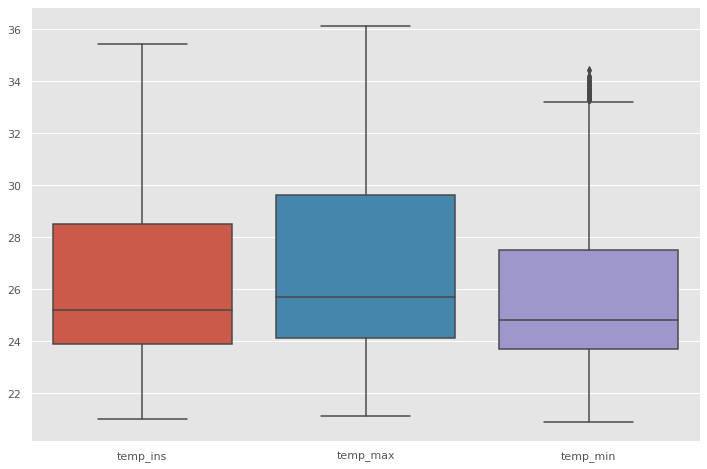

In [29]:
# temperatura
plt.subplots(figsize=(12, 8))

sns.boxplot(data=portogrande.loc[:, ["temp_ins", "temp_max", "temp_min"]]);

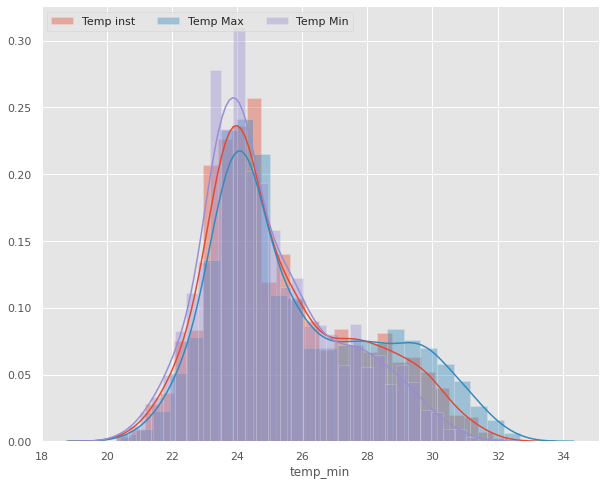

In [10]:
sns.distplot(portogrande.temp_inst)
sns.distplot(portogrande.temp_max)
sns.distplot(portogrande.temp_min)
plt.legend(labels=['Temp inst','Temp Max','Temp Min'], ncol=3, loc='upper left');

In [9]:
portogrande.columns

Index(['codigo_estacao', 'data', 'hora', 'temp_inst', 'temp_max', 'temp_min',
       'umid_inst', 'umid_max', 'umid_min', 'pto_orvalho_inst',
       'pto_orvalho_max', 'pto_orvalho_min', 'pressao', 'pressao_max',
       'pressao_min', 'vento_vel', 'vento_direcao', 'vento_rajada', 'radiacao',
       'precipitacao'],
      dtype='object')

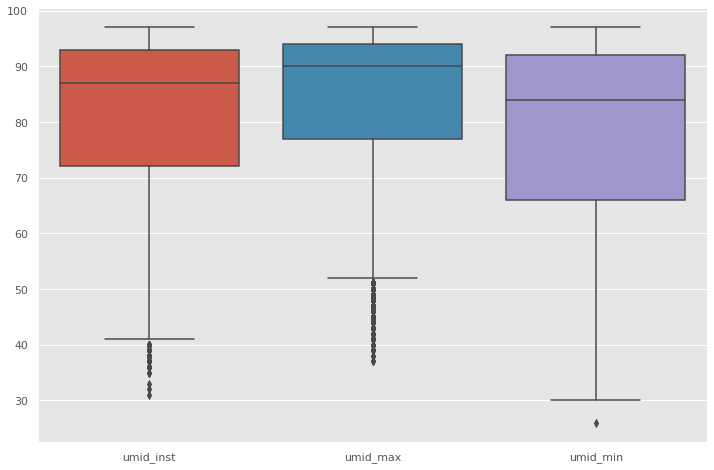

In [30]:
# umidade 
plt.subplots(figsize=(12, 8))

sns.boxplot(data=portogrande.loc[:, ["umid_inst", "umid_max", "umid_min"]]);

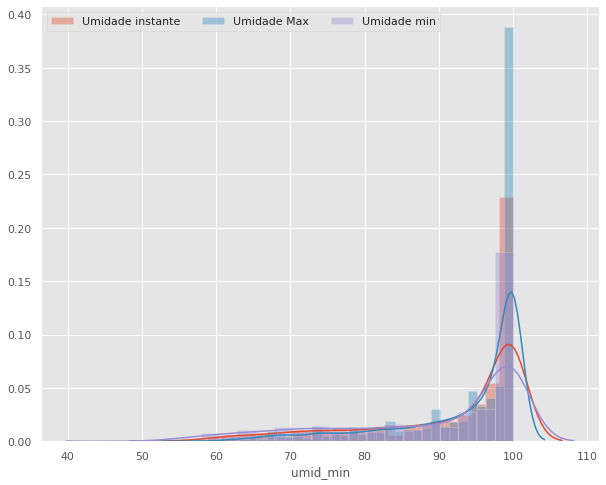

In [11]:
sns.distplot(portogrande.umid_inst)
sns.distplot(portogrande.umid_max)
sns.distplot(portogrande.umid_min)
plt.legend(labels=['Umidade instante','Umidade Max','Umidade min'], ncol=3, loc='upper left');

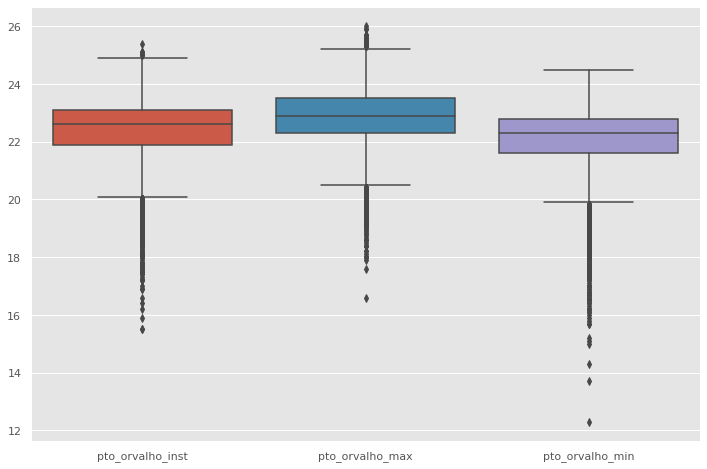

In [31]:
# pt_orvalho (um negocio que ne nem sei o que é)
plt.subplots(figsize=(12, 8))

sns.boxplot(data=portogrande.loc[:,["pto_orvalho_inst", "pto_orvalho_max", "pbto_orvalho_min"]]);

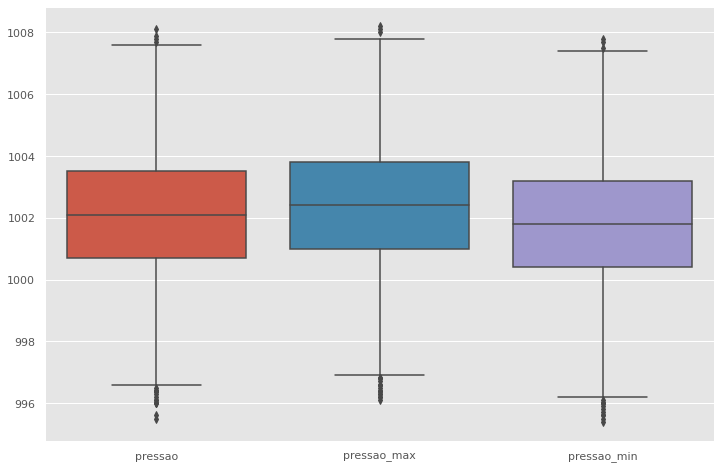

In [32]:
# pressão atmosferica
plt.subplots(figsize=(12, 8))

sns.boxplot(data=portogrande.loc[:,["pressao", "pressao_max","pressao_min"]]);    

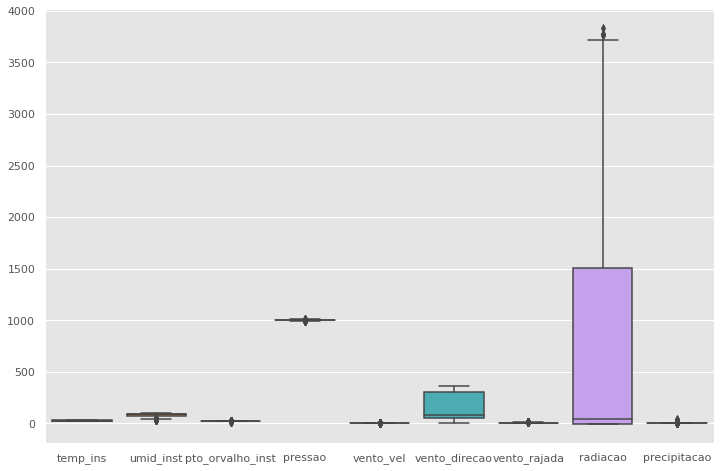

In [33]:
# visão de geral

features = ["temp_ins", "umid_inst", "pto_orvalho_inst",
            "pressao", "vento_vel", "vento_direcao",
            "vento_rajada", "radiacao","precipitacao"]

plt.subplots(figsize=(12, 8))


sns.boxplot(data=portogrande.loc[:, features]);  

- ### Transformações de Johnson, log Normal e a distribuição Normal

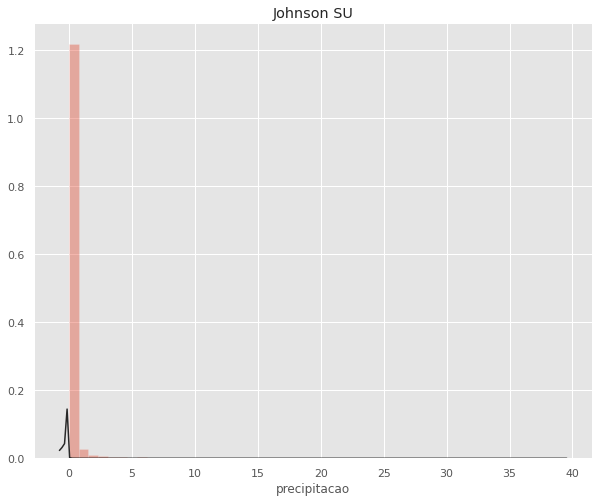

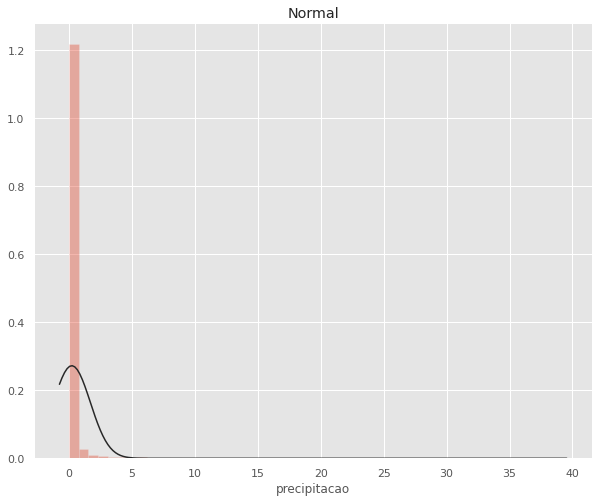

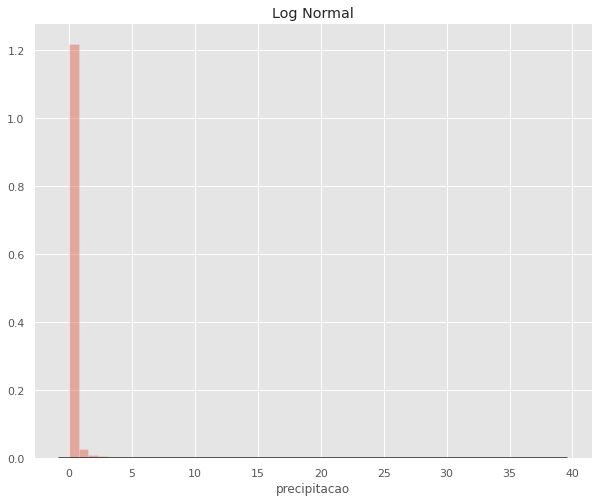

In [34]:
y = portogrande['precipitacao']

plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

# Testes de Hipotese
- Função para gerar samples 

In [30]:
def sample(df, col_name, n=100, seed=42):
    np.random.seed(seed)    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    return df.loc[random_idx, col_name]

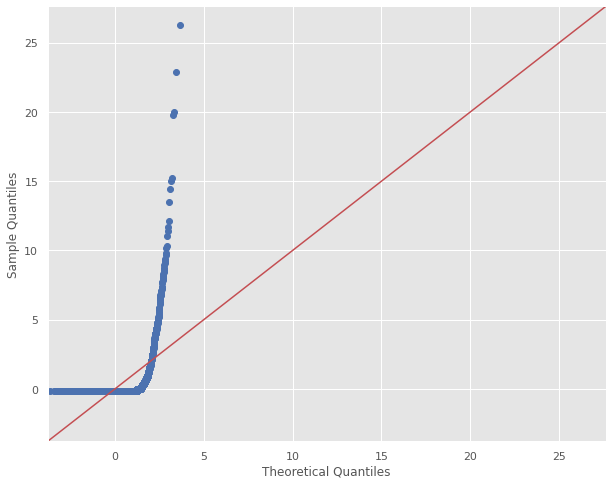

In [36]:
# qqplot de precipitacao do municipio de Porto Grande
sm.qqplot(portogrande.precipitacao, fit=True, line="45"); 

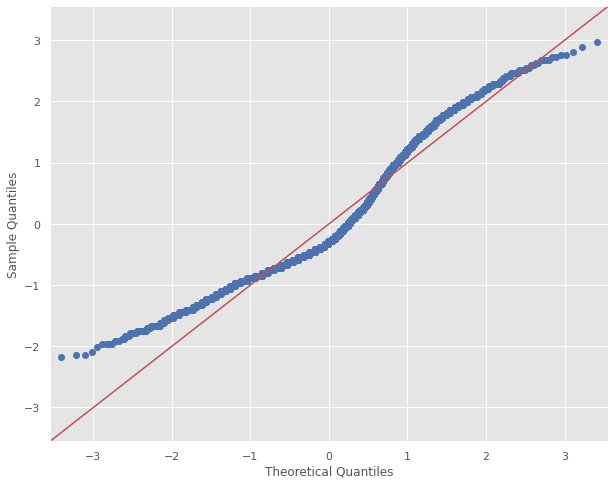

In [21]:
sm.qqplot(portogrande.temp_inst, fit=True, line="45");  # temperatura no instante

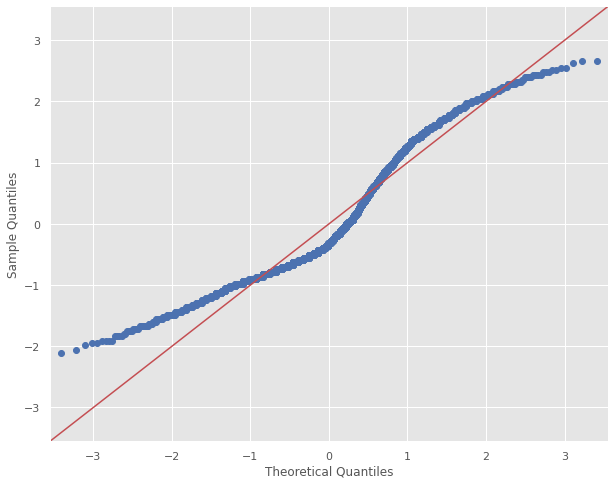

In [22]:
sm.qqplot(portogrande.temp_max, fit=True, line="45"); # temperatura maxima

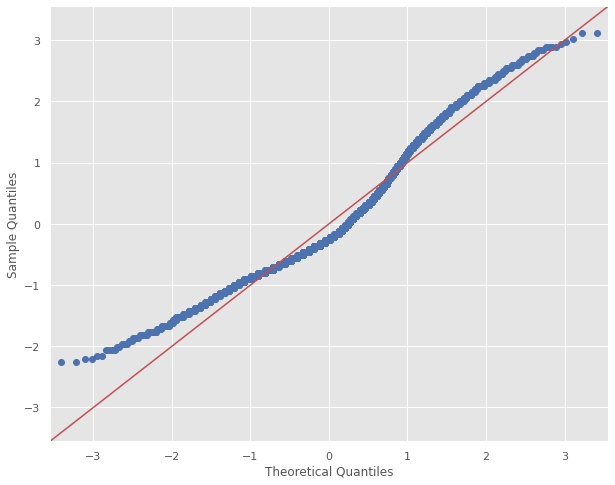

In [23]:
sm.qqplot(portogrande.temp_min, fit=True, line="45"); # temperatura miníma

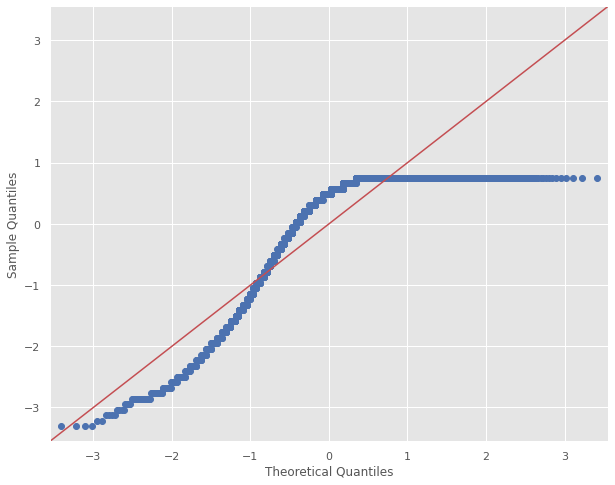

In [24]:
sm.qqplot(portogrande.umid_inst, fit=True, line="45"); # umidade no instante

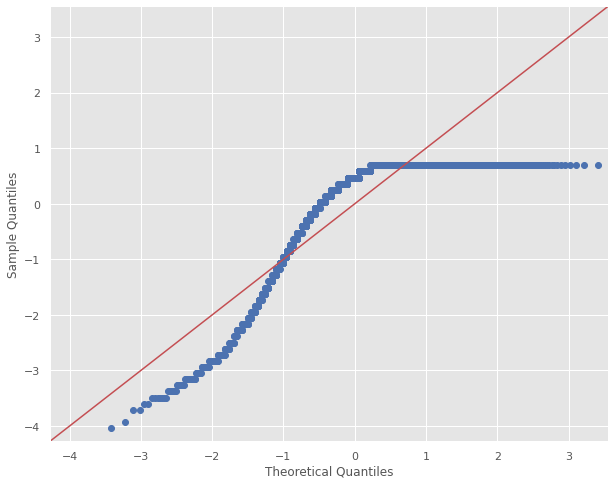

In [25]:
sm.qqplot(portogrande.umid_max, fit=True, line="45"); # umidade maxima

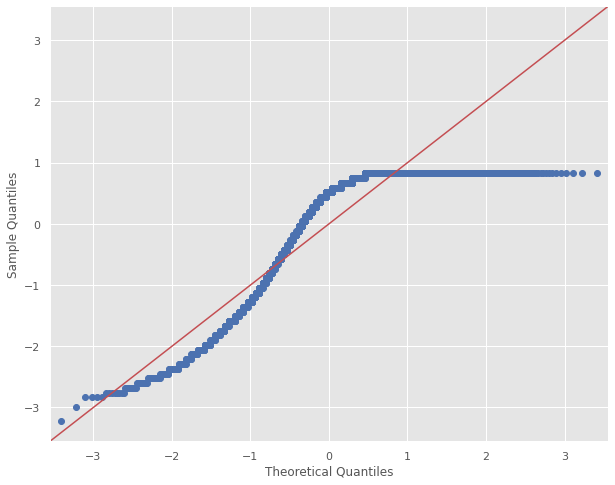

In [27]:
sm.qqplot(portogrande.umid_min, fit=True, line="45"); # umidade maxima

# Teste de Hipotese de Normalidade

### Shapiro-Wilk

O teste de Shapiro-Wilk é um teste de aderência à distribuição normal, que abreviamos para teste de normalidade. Nosso intuito é verificar se uma dada amostra veio ou não de uma distribuição normal.

Não precisamos e não entraremos nos detalhes da sua estatística de teste. Tudo que precisamos saber por ora é:

* A hipótese nula, $H_{0}$, é a normalidade dos dados e A hipotese Alternativa, $H_{a}$ é não normalidade
  * Se o valor-p for menor que o nível de significância $\alpha$, então temos evidências de que os dados não vêm de uma distribuição normal.
  * Se o valor-p for maior que $\alpha$, então não podemos afimar que os dados não vêm de uma distribuição normal (o que é sutilmente diferente de afirmar que eles _vêm_ de uma distribuição normal. Cuidado!).
* Apesar de ter tendência a melhores resultados quanto maior a amostra, a maior parte das implementações não suporta computações com amostras muito grandes.
  * A implementação do SciPy por exemplo só suporta até 5000 observações.
* É altamente aconselhado fazer o teste em conjunto com uma análise gráfica de um _q-q plot_.

In [31]:
ptg_amostra = sample(portogrande,'precipitacao',3000) # amostra
teste = st.shapiro(ptg_amostra) # teste de shapiro

# resultado
if teste[1] < 0.05:
    print('PORTO GRANDE - AP: Precipitação')
    print("--------------------")
    print(f'{teste}\nP_valor: {teste[1]} menor que Alpha = 0.05')
    print('Ha => Os dados não vem de uma distribuição normal')
else:
    print('PORTO GRANDE - AP')
    print("--------------------")
    print(f'{teste}\nP_valor: {teste[1]} maior que Alpha = 0.05')
    print('H0 => Os dados vem de uma distribuição normal')


PORTO GRANDE - AP: Precipitação
--------------------
(0.24920368194580078, 0.0)
P_valor: 0.0 menor que Alpha = 0.05
Ha => Os dados não vem de uma distribuição normal


### Jarque-Bera

Assim como Shapiro-Wilk, o teste de Jarque-Bera é um teste de aderência à distribuição normal com $H_{0}$ sendo a normalidade dos dados. A diferença reside na estatística de teste utilizada.

A estatística de teste é baseada na assimetria (_skewness_) e curtose (_kurtosis_) excessiva da amostra. Se a amostra vem de uma distribuição normal, então esses valores devem ser muito próximos de zero. Se isso acontecer, então a estatística de teste tem distribuição $\chi^{2}$ com dois graus de liberdade.

No entanto, se a amostra for pequena, podemos ter muitos falsos negativos (Erro Tipo I) ao utilizarmos a distribuição $\chi^{2}$, ou seja, rejeitamos $H_{0}$ quando ela é verdadeira.

Para evitar isso, as implementações costumam utilizar aproximações por Monte-Carlo quando $n$ é pequeno, reservando a aproximação $\chi^{2}$ para amostras grandes.

Novamente, é altamente aconselhado complementar o resultado desse teste com um _q-q plot_.

In [38]:
ptg_amostra = sample(portogrande,'precipitacao',3000) # amostra
teste = st.jarque_bera(ptg_amostra) # teste de shapiro

# resultado
if teste[1] < 0.05:
    print('PORTO GRANDE - AP')
    print("--------------------")
    print(f'{teste}\nP_valor: {teste[1]} menor que Alpha = 0.05')
    print('Ha => Os dados não vem de uma distribuição normal')
else:
    print('PORTO GRANDE - AP')
    print("--------------------")
    print(f'{teste}\nP_valor: {teste[1]} maior que Alpha = 0.05')
    print('H0 => Os dados vem de uma distribuição normal')

PORTO GRANDE - AP
--------------------
(5220126.25335673, 0.0)
P_valor: 0.0 menor que Alpha = 0.05
Ha => Os dados não vem de uma distribuição normal
